In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the main dataset and CATE predictions
data = pd.read_csv('../../data/analysis_data/dataset.csv')
s_predictions = pd.read_csv('../../results/s_predictions.csv')
t_predictions = pd.read_csv('../../results/t_predictions.csv')
x_predictions = pd.read_csv('../../results/x_predictions.csv')
r_predictions = pd.read_csv('../../results/r_predictions.csv')


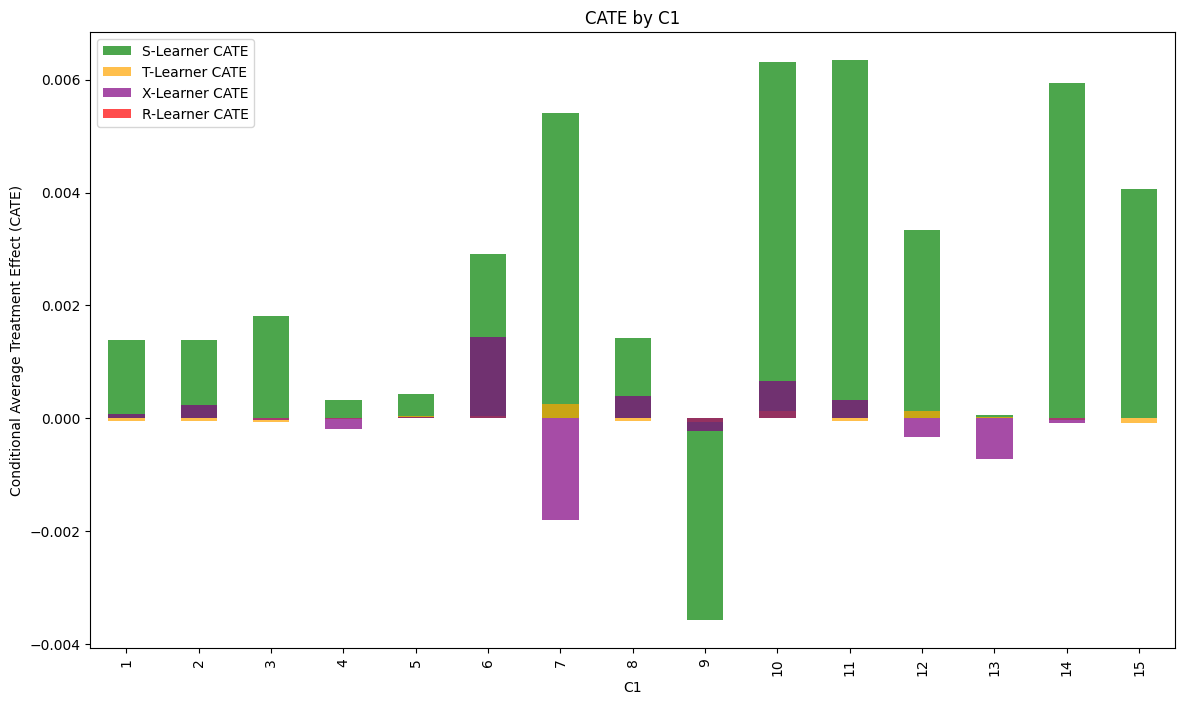

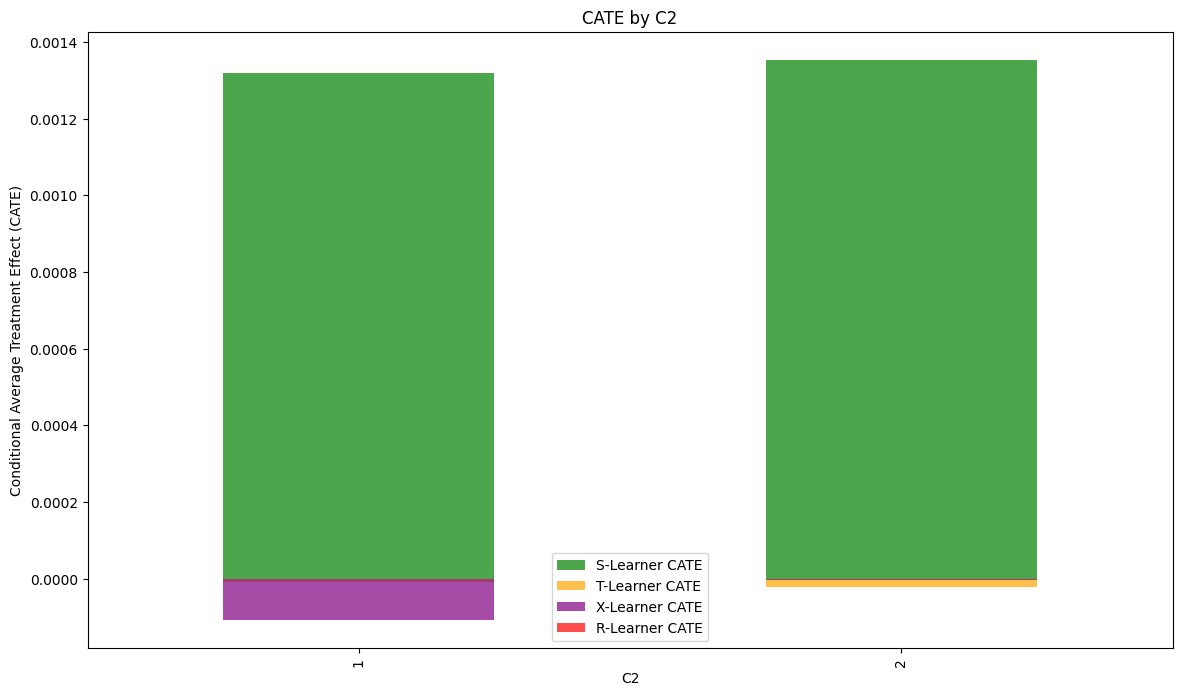

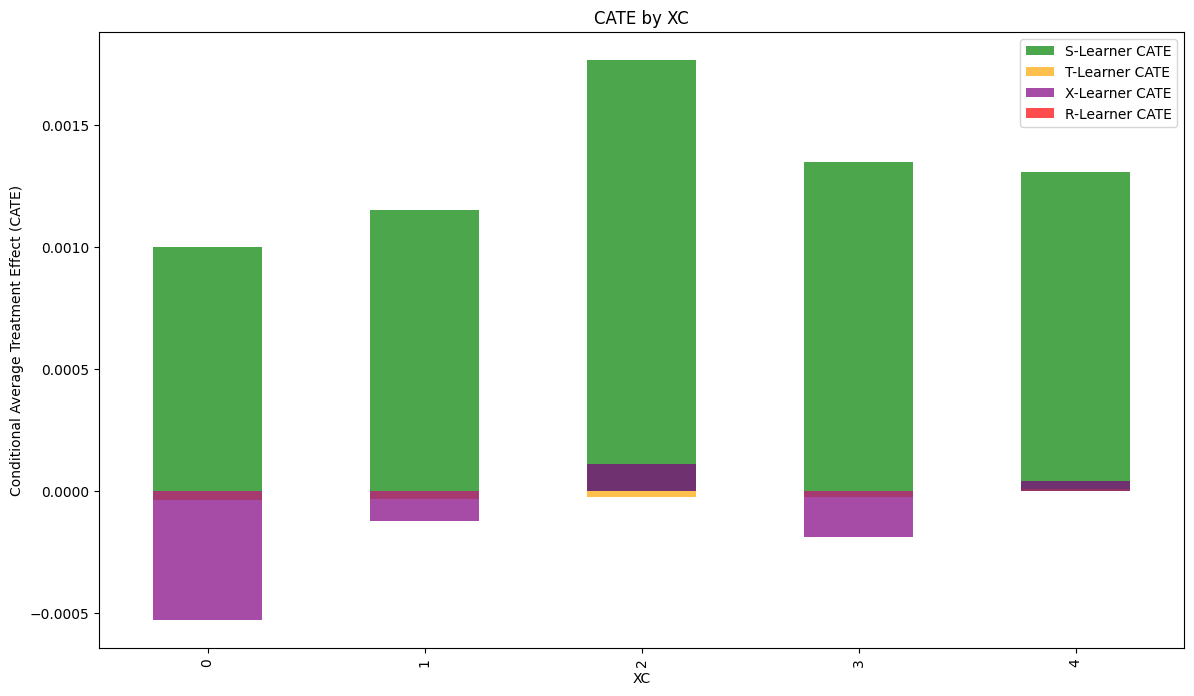

In [3]:
# Ensure the datasets align by index
# Rename the columns for clarity if necessary
s_predictions = s_predictions.rename(columns={'s_CATE': 'S-Learner CATE'})
t_predictions = t_predictions.rename(columns={'t_CATE': 'T-Learner CATE'})
x_predictions = x_predictions.rename(columns={'x_CATE': 'X-Learner CATE'})
r_predictions = r_predictions.rename(columns={'r_CATE': 'R-Learner CATE'})

# Combine all CATE estimates with the main data by aligning rows based on their index
combined_data = pd.concat([data, s_predictions['S-Learner CATE'], 
                           t_predictions['T-Learner CATE'], 
                           x_predictions['X-Learner CATE'], 
                           r_predictions['R-Learner CATE']], axis=1)

# Define a color palette for each meta-learner
learner_colors = {
    'S-Learner CATE': 'green',
    'T-Learner CATE': 'orange',
    'X-Learner CATE': 'purple',
    'R-Learner CATE': 'red'
}

# Define a function to plot CATE by a given demographic
def plot_cate_by_demographic(df, demographic, learners, colors):
    plt.figure(figsize=(14, 8))
    for learner in learners:
        # Calculate mean CATE per demographic group
        cate_by_demo = df.groupby(demographic)[learner].mean()
        cate_by_demo.plot(kind='bar', alpha=0.7, color=colors[learner], label=learner)
        
    plt.title(f'CATE by {demographic}')
    plt.xlabel(demographic)
    plt.ylabel('Conditional Average Treatment Effect (CATE)')
    plt.legend()
    plt.show()

# List of demographics to analyze
demographics = ['C1', 'C2', 'XC']  # Replace with exact column names from the original dataset
learners = ['S-Learner CATE', 'T-Learner CATE', 'X-Learner CATE', 'R-Learner CATE']

# Plot CATE for each demographic
for demo in demographics:
    plot_cate_by_demographic(combined_data, demo, learners, learner_colors)
